# Regresión polinomial


La regresión *lineal* polinómica es una caso especial de regresión lineal simple. Su expresión matemática es la siguiente:

$$
y = b_{0} + b_{1}x_{1} + b_{2}x_{1}^{2} + ... + b_{n}x_{1}^{n}
$$

El hecho de que se siga llamando *lineal* cuando las variables son claramente no-lineales es debido a que no nos fijamos en dichas variables sino en los coeficientes que acompañan a dichas variables. Estos coeficientes son las incognitas que queremos averiguar y estos son lineales respecto a la *salida* o variable *y*.



Vamos a crear un *dataset* sintético que nos sirva como base para aplicar la teoría anterior.

Para que el ajuste no sea perfecto vamos a añadir a nuestros datos sintéticos un poco de ruido.

## Importando bibliotecas

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn style
sns.set()
np.random.seed(42)

In [2]:
colores = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']

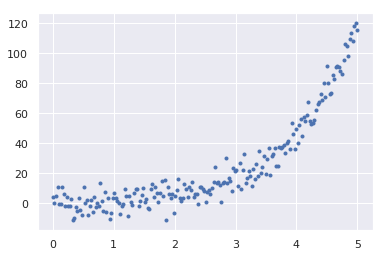

In [3]:
# Data
X = np.linspace(0, 5, 200)
res = 6.4 * np.random.randn(200)
y = res + 0.83 * np.exp(X)

# Reshape the data
X_s = np.reshape(a=X, newshape=(-1, 1))
y_s = np.reshape(a=y, newshape=(-1, 1))

plt.plot(X, y,
         marker='.', linestyle='none')
plt.show()

Una vez generados los datos sintéticos vamos a continuar realizando, tanto una regresión lineal simple como una regresión lineal **polinómica** y veamos las diferencias entre ellas.

### Regresión lineal simple

Comenzamos con la regresión lineal simple para poder hacer una comparativa con la regresión lineal polinómica. Así veremos si hay realmente un mejor ajuste, y como influye este ajuste a las métricas.

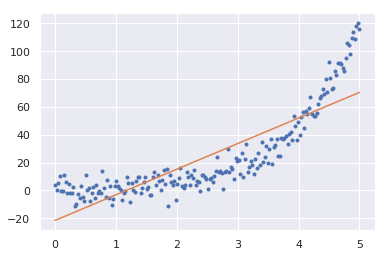

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# fitting
regressor.fit(X_s, y_s)
y_pred = regressor.predict(X_s)

# Visualizando la predicción
plt.plot(X, y, marker='.', linestyle='none')
plt.plot(X, y_pred)
plt.show()

## Regresión polinómica

Vamos a realizar un pequeño ejemplo para ver como funciona la clase *PolynomialFeatures*

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Ejemplo de uso de PolynomialFeatures
x = np.reshape(np.linspace(1,5,5), newshape=(-1,1))

# Iniciamos la clase de grado 3
poly = PolynomialFeatures(degree = 3)

# Transformamos nuestros datos
x_poly = poly.fit_transform(x)

# visualizamos
print(x_poly)

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


Iniciamos una nueva instancia e intentamos encontrar un mejor ajuste a los datos.

In [6]:
# Importamos bibliotecas
from sklearn.preprocessing import PolynomialFeatures

# Llamamos a la clase
poly_reg = PolynomialFeatures(degree = 2)
regressor_2 = LinearRegression()

# fit transform
X_poly = poly_reg.fit_transform(X_s)
poly_reg.fit(X_poly, y_s)

# predict
regressor_2.fit(X_poly, y_s)
y_pred_poly = regressor_2.predict(poly_reg.fit_transform(X_s))

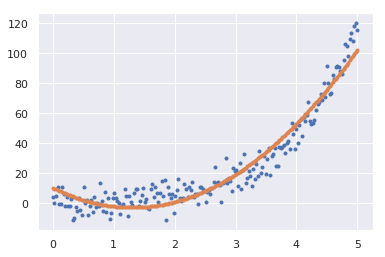

In [7]:
# Visualizando la predicción
plt.plot(X, y, marker='.', linestyle='none')
plt.plot(X_s, y_pred_poly, marker='.', linestyle='-')
plt.show()

### Usando pipelines

Función:
```
 sklearn.pipeline.make_pipeline(*steps, **kwargs)[source]
```

Vamos a explicar la función anterior con un ejemplo.

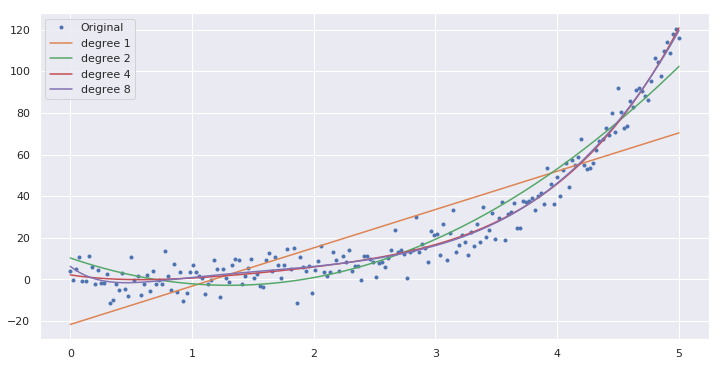

In [8]:
# Importamos biblioteca para la pipeline
from sklearn.pipeline import make_pipeline

# grados
degrees = [1, 2, 4, 8]

# Representamos los datos originales
plt.figure(figsize=(12,6))
plt.plot(X, y, marker='.', linestyle='none', label='Original')

# Array solución
y_preds = np.empty(shape=(len(degrees), len(y), 1))

# Modelo
for count, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    y_preds[count] = model.fit(X_s, y_s).predict(X_s)
    plt.plot(X_s, y_preds[count], label="degree %d" % degree)
plt.legend()
plt.show()    

### Métricas

* $R^2$
* MSE

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
print("Degrees {:<10} {:<10}  {:<10}".format(" ", "MSE", "r2"))
for i in range(len(y_preds)):
    MSE_poly = mean_squared_error(y_s, y_preds[i])
    r2_poly = r2_score(y_s, y_preds[i])
    print("degree {:<10}  {:<10}  {:<10}".format(i + 1,
                                  np.round(MSE_poly, 3),
                                  np.round(r2_poly, 2)))

Degrees            MSE         r2        
degree 1           274.536     0.72      
degree 2           64.279      0.93      
degree 3           34.225      0.97      
degree 4           33.67       0.97      


Como era de esperar, hemos obtenido mejores resultados para la regresión polinómica. 

## Guardando información

In [11]:
"""import pandas as pd

matrix = np.concatenate(X,y, axis=1)
matrix.to_csv('data/data.csv')"""

"import pandas as pd\n\nmatrix = np.concatenate(X,y, axis=1)\nmatrix.to_csv('data/data.csv')"